# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Importing Dataset

In [2]:
# Load the dataset
df = pd.read_csv('fruit_data_with_colors.txt', sep='\t')  # Adjust the separator if necessary

# Exploratory Data Analysis

In [3]:
display(df.head())

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
print(df.isnull().sum())

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64


In [5]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [7]:
df.shape

(59, 7)

In [8]:
df.size

413

In [9]:
df.ndim

2

In [10]:
df.dtypes

fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object

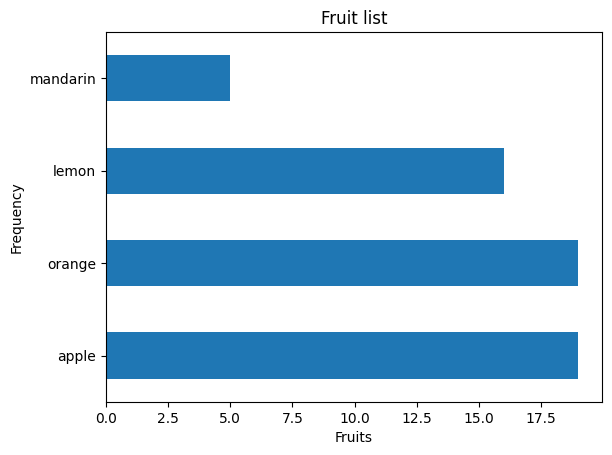

In [11]:
df['fruit_name'].value_counts().plot(kind='barh')
plt.title('Fruit list')
plt.xlabel('Fruits')
plt.ylabel('Frequency')
plt.show()

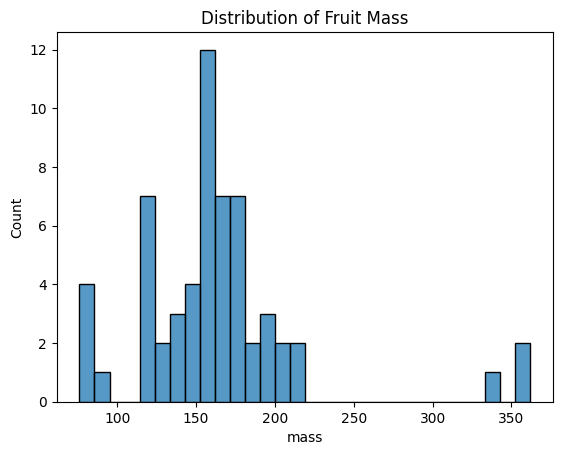

In [12]:
sns.histplot(df['mass'], bins=30)
plt.title('Distribution of Fruit Mass')
plt.show()

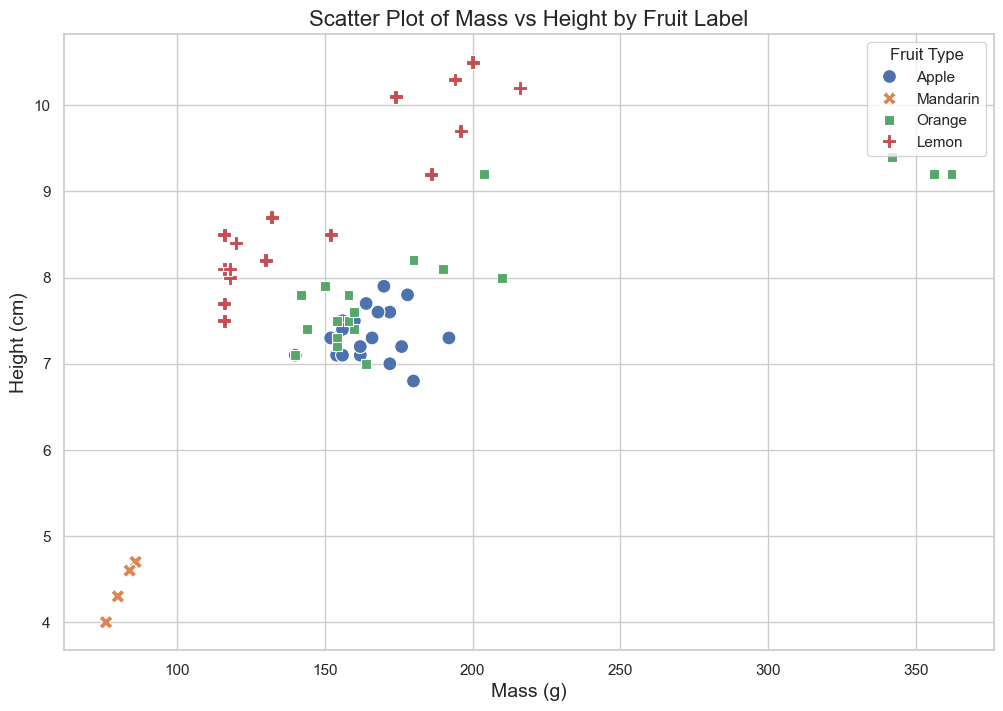

In [13]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df, x='mass', y='height', hue='fruit_label', style='fruit_label', s=100, palette='deep')

# Add title and labels
plt.title('Scatter Plot of Mass vs Height by Fruit Label', fontsize=16)
plt.xlabel('Mass (g)', fontsize=14)
plt.ylabel('Height (cm)', fontsize=14)

# Create a legend with custom labels for better understanding
legend_labels = {1: 'Apple', 2: 'Mandarin', 3: 'Orange', 4: 'Lemon'}
handles, labels = scatter.get_legend_handles_labels()
new_labels = [legend_labels[int(label)] for label in labels]
plt.legend(handles, new_labels, title='Fruit Type')

# Show the plot
plt.show()

In [14]:
# Remove unwated columns
df.drop(['fruit_subtype'], axis=1, inplace=True)  

# Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['fruit_name'] = le.fit_transform(df['fruit_name'])

df['fruit_name']

0     0
1     0
2     0
3     2
4     2
5     2
6     2
7     2
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
56    1
57    1
58    1
Name: fruit_name, dtype: int32

# Train - Test Split  

In [16]:
X = df.drop(['fruit_label', 'fruit_name'], axis=1).values  # Features
y = df['fruit_label'].values  # Target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(47, 4)
(12, 4)
(47,)
(12,)


In [19]:
print(X_train)

[[160.     7.1    7.6    0.76]
 [210.     7.8    8.     0.82]
 [178.     7.1    7.8    0.92]
 [168.     7.5    7.6    0.73]
 [ 80.     5.9    4.3    0.81]
 [ 84.     6.     4.6    0.79]
 [116.     6.1    8.5    0.71]
 [162.     7.4    7.2    0.85]
 [158.     7.1    7.5    0.79]
 [130.     6.     8.2    0.71]
 [200.     7.3   10.5    0.72]
 [116.     6.3    7.7    0.72]
 [156.     7.7    7.1    0.69]
 [172.     7.4    7.     0.89]
 [204.     7.5    9.2    0.77]
 [362.     9.6    9.2    0.74]
 [156.     7.6    7.5    0.67]
 [342.     9.     9.4    0.75]
 [190.     7.5    8.1    0.74]
 [116.     5.9    8.1    0.73]
 [180.     7.6    8.2    0.79]
 [172.     7.1    7.6    0.92]
 [164.     7.2    7.     0.8 ]
 [118.     5.9    8.     0.72]
 [154.     7.1    7.5    0.78]
 [154.     7.3    7.3    0.79]
 [160.     7.     7.4    0.81]
 [194.     7.2   10.3    0.7 ]
 [180.     8.     6.8    0.59]
 [156.     7.4    7.4    0.84]
 [176.     7.4    7.2    0.6 ]
 [216.     7.3   10.2    0.71]
 [144.  

# Model fitting 

In [20]:
# Initialize the model
model = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

# Print the accuracy for each fold and the average accuracy
print(f'Cross-validation scores: {cv_scores}')
print(f'Average accuracy: {np.mean(cv_scores)}')

Cross-validation scores: [1.         0.91666667 0.91666667 0.91666667 1.        ]
Average accuracy: 0.95


In [21]:
model.fit(X_train, y_train)

RandomForestClassifier()

# Model evautaion

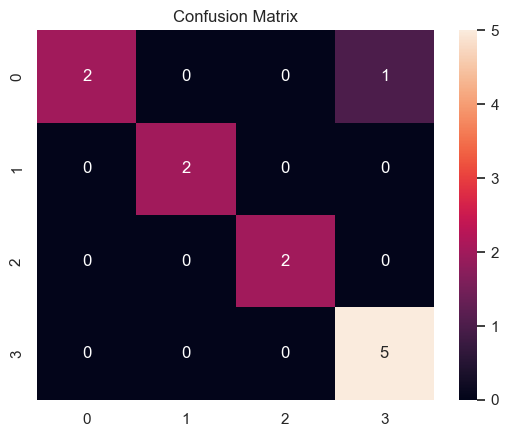

In [23]:
cm = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.show()

# Model dumping

In [24]:
import joblib

# Dump the model to a file
joblib.dump(model, 'fruit_classifier_model.joblib')

print("Model has been saved!")

Model has been saved!


# Model loading

In [25]:
df[:5]

,fruit_label,fruit_name,mass,width,height,color_score
0,1,0,192,8.4,7.3,0.55
1,1,0,180,8.0,6.8,0.59
2,1,0,176,7.4,7.2,0.60
3,2,2,86,6.2,4.7,0.80
4,2,2,84,6.0,4.6,0.79


In [26]:
df.iloc[0,2:].values

array([192.  ,   8.4 ,   7.3 ,   0.55])

In [27]:
model = joblib.load('fruit_classifier_model.joblib')

In [28]:
print(f'Actual: {df.iloc[0, 0]}, Predicted: {model.predict(df.iloc[0,2:].values.reshape(1, -1))[0]}')
print(f'Actual: {df.iloc[1, 0]}, Predicted: {model.predict(df.iloc[1,2:].values.reshape(1, -1))[0]}')
print(f'Actual: {df.iloc[4, 0]}, Predicted: {model.predict(df.iloc[4,2:].values.reshape(1, -1))[0]}')
print(f'Actual: {df.iloc[30, 0]}, Predicted: {model.predict(df.iloc[30,2:].values.reshape(1, -1))[0]}')
print(f'Actual: {df.iloc[50, 0]}, Predicted: {model.predict(df.iloc[50,2:].values.reshape(1, -1))[0]}')

Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 2, Predicted: 2
Actual: 3, Predicted: 3
Actual: 4, Predicted: 4


# StreamLit

In [29]:
%%writefile app.py
import streamlit as st
import joblib

# Load the trained model
model = joblib.load('fruit_classifier_model.joblib')

# Set the title of the app
st.title('🍏 Fruit Classification App 🍊')

# Create a sidebar for user inputs
st.sidebar.header('Input Features')

# Input features from user using sliders
mass = st.sidebar.slider('Mass (g)', min_value=76, max_value=362, value=163, step=1)
width = st.sidebar.slider('Width (cm)', min_value=5.8, max_value=9.6, value=7.1, step=0.1)
height = st.sidebar.slider('Height (cm)', min_value=4.0, max_value=10.5, value=7.7, step=0.1)
color_score = st.sidebar.slider('Color Score', min_value=0.55, max_value=0.93, value=0.76, step=0.01)

# Predict button
if st.sidebar.button('Predict'):
    input_data = [[mass, width, height, color_score]]
    prediction = model.predict(input_data)
    
    # Display the prediction result
    st.write(f'### The predicted fruit label is: **{prediction[0]}**')
    
    # Optionally display a message based on the prediction
    fruit_names = {1: 'Apple', 2: 'Mandarin', 3: 'Orange', 4: 'Lemon'}
    st.write(f'### Fruit Name: **{fruit_names.get(prediction[0], "Unknown")}**')

Overwriting app.py


<h3>Conclusion: In this project, we build a machine learning model -- Random Forest -- for predicting type of fruits from the input. We achieve around <i>95%</i> of accuracy.</h3> 